In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('ANN.csv')
df

,0,1,y
0,0.694565,0.426664,0
1,1.683530,-0.800166,0
2,-0.250468,0.243922,1
3,-1.133380,-0.611279,1
4,1.769056,-0.310254,0
...,...,...,...
196,1.419756,0.067688,0
197,0.344427,0.025001,1
198,0.349166,1.063136,1
199,1.454850,-0.060964,0


In [24]:
dataset = df.values

In [25]:
X = dataset[:,0:10]

In [26]:
Y = dataset[:,2]

In [27]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [28]:
X_scale

array([[0.56210626, 0.58615994, 0.        ],
       [0.81041261, 0.13468994, 0.        ],
       [0.32483019, 0.51891148, 1.        ],
       [0.10315145, 0.20420007, 1.        ],
       [0.83188614, 0.31497612, 0.        ],
       [0.89043712, 0.36073081, 1.        ],
       [0.61662351, 0.60209103, 1.        ],
       [0.60919648, 0.25728987, 0.        ],
       [0.57604222, 0.55425067, 1.        ],
       [0.71464146, 0.16295844, 0.        ],
       [0.2876952 , 0.53832316, 1.        ],
       [0.38508557, 0.29375177, 0.        ],
       [0.83491935, 0.26354871, 1.        ],
       [0.78611809, 0.43207865, 1.        ],
       [0.18092129, 0.80406839, 1.        ],
       [0.64049778, 0.48416349, 0.        ],
       [0.57497785, 0.79231859, 0.        ],
       [0.38482221, 0.34333143, 0.        ],
       [0.43270099, 0.69333183, 1.        ],
       [0.09768693, 0.93395298, 0.        ],
       [0.93662192, 0.43055915, 0.        ],
       [0.60800628, 0.27823849, 1.        ],
       [0.

In [29]:
#Spliiting the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [30]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(140, 3) (30, 3) (31, 3) (140,) (30,) (31,)


Text(0.5, 1.0, 'Sigmoid Function')

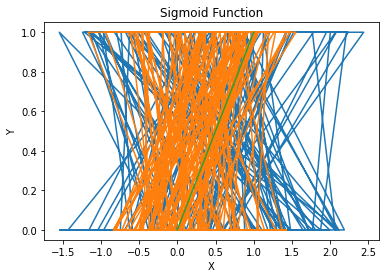

In [31]:
def sigmoid(X):
    val = 1/(1+np.exp(-X))
    return val

output = sigmoid(X)

plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Sigmoid Function")

In [32]:
#Neural Network
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[13,8,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)

In [33]:
#Activation Function
def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

In [34]:
relu(X,Y)

array([0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.])

In [35]:
#Sigmoid Function
def sigmoid(self,Z):
        '''
        The sigmoid function takes in real numbers in any range and 
        squashes it to a real-valued output between 0 and 1.
        '''
        return 1.0/(1.0+np.exp(-Z))

In [36]:
sigmoid(X,Y)

array([0.5       , 0.5       , 0.73105858, 0.73105858, 0.5       ,
       0.73105858, 0.73105858, 0.5       , 0.73105858, 0.5       ,
       0.73105858, 0.5       , 0.73105858, 0.73105858, 0.73105858,
       0.5       , 0.5       , 0.5       , 0.73105858, 0.5       ,
       0.5       , 0.73105858, 0.73105858, 0.5       , 0.73105858,
       0.5       , 0.73105858, 0.73105858, 0.73105858, 0.73105858,
       0.5       , 0.5       , 0.5       , 0.73105858, 0.73105858,
       0.5       , 0.73105858, 0.73105858, 0.5       , 0.5       ,
       0.73105858, 0.73105858, 0.5       , 0.5       , 0.73105858,
       0.73105858, 0.5       , 0.5       , 0.5       , 0.73105858,
       0.73105858, 0.5       , 0.73105858, 0.73105858, 0.5       ,
       0.73105858, 0.5       , 0.5       , 0.73105858, 0.5       ,
       0.5       , 0.73105858, 0.5       , 0.73105858, 0.5       ,
       0.73105858, 0.5       , 0.5       , 0.73105858, 0.5       ,
       0.5       , 0.73105858, 0.5       , 0.73105858, 0.73105

In [37]:
#Loss Function
def entropy_loss(self,y, yhat):
        nsample = len(y)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
        return loss

In [38]:
#Forward Propagation
    
def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

In [39]:
#Backward Propagation
def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        def dRelu(x):
            x[x<=0] = 0
            x[x>0] = 1
            return x
        
        dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat)))
        dl_wrt_sig = yhat * (1-yhat)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

        dl_wrt_z1 = dl_wrt_A1 * dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)


In [40]:
def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

In [41]:
def predict(self, X):
        '''
        Predicts on a test data
        '''
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)  

In [42]:
def acc(self, y, yhat):
        '''
        Calculates the accuracy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc

In [80]:
sknet.fit(Xtrain, ytrain)
preds_train = sknet.predict(Xtrain)
preds_test = sknet.predict(Xtest)

print("Train accuracy of sklearn neural network: {}".format(round(accuracy_score(preds_train, ytrain),2)*100))
print("Test accuracy of sklearn neural network: {}".format(round(accuracy_score(preds_test, ytest),2)*100))

Train accuracy of sklearn neural network: 68.0
Test accuracy of sklearn neural network: 66.0
